In [26]:
#Import required libraries
#Data Management
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the data
df=pd.read_csv("CreditcardfraudDatacsv.csv")


In [4]:
#Stats
normal_df = df[df['is_fraud']==0]
fraud_df = df[df['is_fraud']==1]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   date                    100000 non-null  object 
 1   time                    100000 non-null  object 
 2   cc_num                  100000 non-null  float64
 3   merchant                100000 non-null  object 
 4   category                100000 non-null  object 
 5   amt                     100000 non-null  float64
 6   first                   100000 non-null  object 
 7   last                    100000 non-null  object 
 8   gender                  100000 non-null  object 
 9   street                  100000 non-null  object 
 10  city                    100000 non-null  object 
 11  state                   100000 non-null  object 
 12  zip                     100000 non-null  int64  
 13  lat                     100000 non-null  float64
 14  long                 

In [6]:
print(df.columns)

Index(['date', 'time', 'cc_num', 'merchant', 'category', 'amt', 'first',
       'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long',
       'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'previous_fraud_history',
       'no_of_fraud_attempts', 'session', 'Age', 'Weekday', 'Week'],
      dtype='object')


In [7]:
columns_to_drop = ['first', 'last', 'street','state','dob','city_pop','zip','lat','long','date','time','merch_lat','merch_long']
df = df.drop(columns=columns_to_drop)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   cc_num                  100000 non-null  float64
 1   merchant                100000 non-null  object 
 2   category                100000 non-null  object 
 3   amt                     100000 non-null  float64
 4   gender                  100000 non-null  object 
 5   city                    100000 non-null  object 
 6   job                     100000 non-null  object 
 7   trans_num               100000 non-null  object 
 8   unix_time               100000 non-null  int64  
 9   is_fraud                100000 non-null  int64  
 10  previous_fraud_history  100000 non-null  object 
 11  no_of_fraud_attempts    100000 non-null  int64  
 12  session                 100000 non-null  object 
 13  Age                     100000 non-null  int64  
 14  Weekday              

In [9]:
df['merchant'] = df['merchant'].astype('category').cat.codes.astype('int64')
df['category'] = df['category'].astype('category').cat.codes.astype('float')
df['gender'] = df['gender'].astype('category').cat.codes.astype('int64')
df['city'] = df['city'].astype('category').cat.codes.astype('float')
df['job'] = df['job'].astype('category').cat.codes.astype('float')
df['unix_time'] = df['unix_time'].astype('category').cat.codes.astype('int64')

df['session'] = df['session'].astype('category').cat.codes.astype('float')
df['Weekday'] = df['Weekday'].astype('category').cat.codes.astype('float')
df['Week'] = df['Week'].astype('category').cat.codes.astype('float')
df['trans_num'] = df['trans_num'].astype('category').cat.codes.astype('float')
df['previous_fraud_history'] = df['previous_fraud_history'].astype('category').cat.codes.astype('float')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   cc_num                  100000 non-null  float64
 1   merchant                100000 non-null  int64  
 2   category                100000 non-null  float64
 3   amt                     100000 non-null  float64
 4   gender                  100000 non-null  int64  
 5   city                    100000 non-null  float64
 6   job                     100000 non-null  float64
 7   trans_num               100000 non-null  float64
 8   unix_time               100000 non-null  int64  
 9   is_fraud                100000 non-null  int64  
 10  previous_fraud_history  100000 non-null  float64
 11  no_of_fraud_attempts    100000 non-null  int64  
 12  session                 100000 non-null  float64
 13  Age                     100000 non-null  int64  
 14  Weekday              

In [11]:
#label Encoder
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()

# Encode the specified columns
columns_to_encode = ['category', 'merchant', 'gender', 'previous_fraud_history', 'session', 'Weekday', 'Week', 'city', 'job']
df_encoded = df.copy()
for col in columns_to_encode:
    df_encoded[col] = encoder.fit_transform(df[col])

# Use the encoded DataFrame for further analysis
print(df_encoded.head())  # View the first few rows of encoded data

         cc_num  merchant  category     amt  gender  city  job  trans_num  \
0  4.930000e+15        73         4  368.78       0   136  330     6625.0   
1  3.590000e+15       494         4  356.20       0   739  128    74027.0   
2  4.250000e+15       329         4  333.39       1    11  379    65843.0   
3  4.430000e+15       328         4  318.65       0   270   85    57748.0   
4  3.560000e+15       245         8  736.28       1   667  319    89183.0   

   unix_time  is_fraud  previous_fraud_history  no_of_fraud_attempts  session  \
0      41509         1                       1                     4        1   
1      56407         1                       1                     1        2   
2      25609         1                       1                     4        1   
3      65519         1                       1                     0        1   
4      63599         1                       1                     3        1   

   Age  Weekday  Week  
0   46        0     6  
1 

In [12]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   cc_num                  100000 non-null  float64
 1   merchant                100000 non-null  int64  
 2   category                100000 non-null  int64  
 3   amt                     100000 non-null  float64
 4   gender                  100000 non-null  int64  
 5   city                    100000 non-null  int64  
 6   job                     100000 non-null  int64  
 7   trans_num               100000 non-null  float64
 8   unix_time               100000 non-null  int64  
 9   is_fraud                100000 non-null  int64  
 10  previous_fraud_history  100000 non-null  int64  
 11  no_of_fraud_attempts    100000 non-null  int64  
 12  session                 100000 non-null  int64  
 13  Age                     100000 non-null  int64  
 14  Weekday              

In [13]:
# Print the shape of the data
# data = data.sample(frac = 0.1, random_state = 48)
print(df.shape)
print(df.describe())

(100000, 16)
             cc_num      merchant       category            amt  \
count  1.000000e+05  100000.00000  100000.000000  100000.000000   
mean   4.103267e+17     342.51085       6.222920      69.535162   
std    1.298763e+18     200.95441       3.910762     151.161460   
min    6.041621e+10       0.00000       0.000000       1.000000   
25%    1.800000e+14     165.00000       3.000000       9.690000   
50%    3.520000e+15     345.00000       6.000000      47.380000   
75%    4.640000e+15     513.00000      10.000000      82.990000   
max    4.990000e+18     692.00000      13.000000   17897.240000   

              gender           city            job      trans_num  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.453740     431.289850     245.462020   49990.931890   
std         0.497858     249.697613     137.644963   28862.836264   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000     217.000000   

In [14]:
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
cc_num,0.0
merchant,0.0
category,0.0
amt,0.0
gender,0.0
city,0.0
job,0.0
trans_num,0.0
unix_time,0.0
is_fraud,0.0


In [15]:
classes = df['is_fraud'].value_counts()
classes

,count
is_fraud,
0,99479
1,521


In [16]:
normal_share = round((classes[0]/df['is_fraud'].count()*100),2)
normal_share

99.48

In [17]:
fraud_share = round((classes[1]/df['is_fraud'].count()*100),2)
fraud_share

0.52

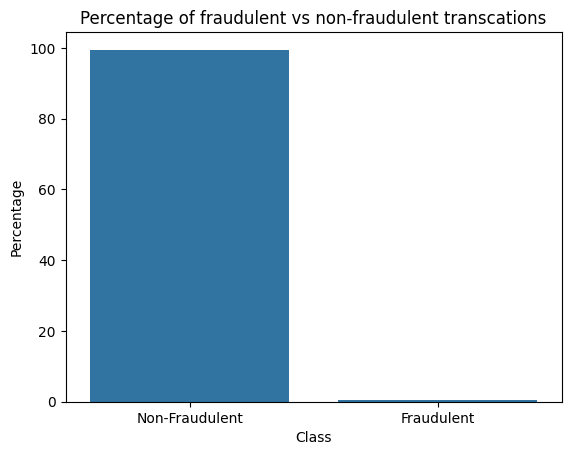

In [18]:
#df.is_fraud.value_counts().plot(kind='bar')
# Bar plot for the percentage of fraudulent vs non-fraudulent transcations
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]}
df_fraud_percentage = pd.DataFrame(fraud_percentage)
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')
plt.show()

In [19]:
# Creating fraudulent dataframe
data_fraud = df[df['is_fraud'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = df[df['is_fraud'] == 0]

In [20]:
import warnings
warnings.filterwarnings('ignore')

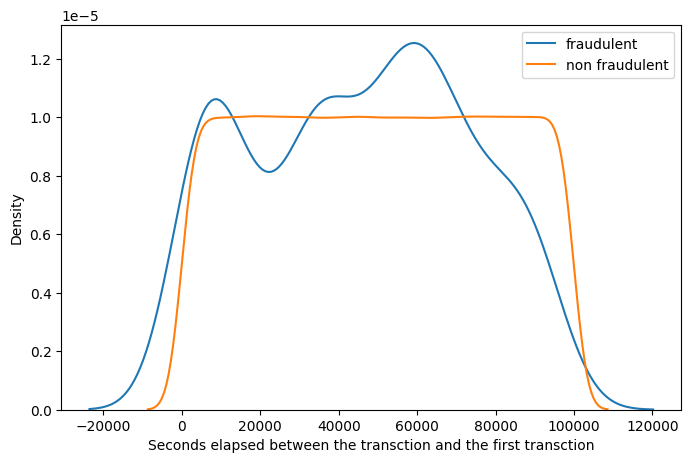

In [21]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['unix_time'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['unix_time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
ax.legend(loc='upper right')
plt.show()

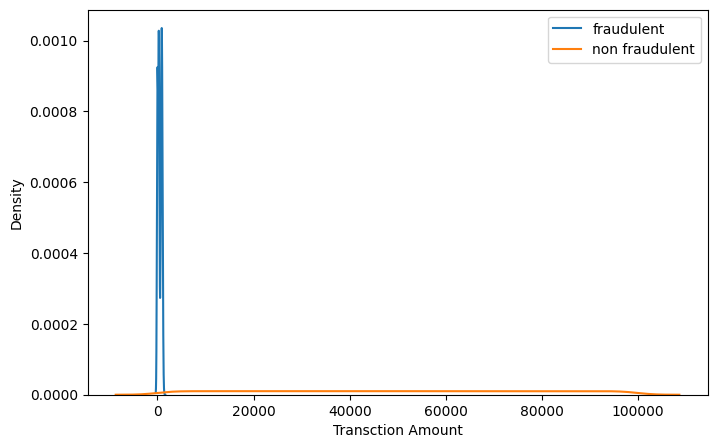

In [22]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['amt'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['unix_time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
ax.legend(loc='upper right')
plt.show()

**Plotting the Correlation Matrix**

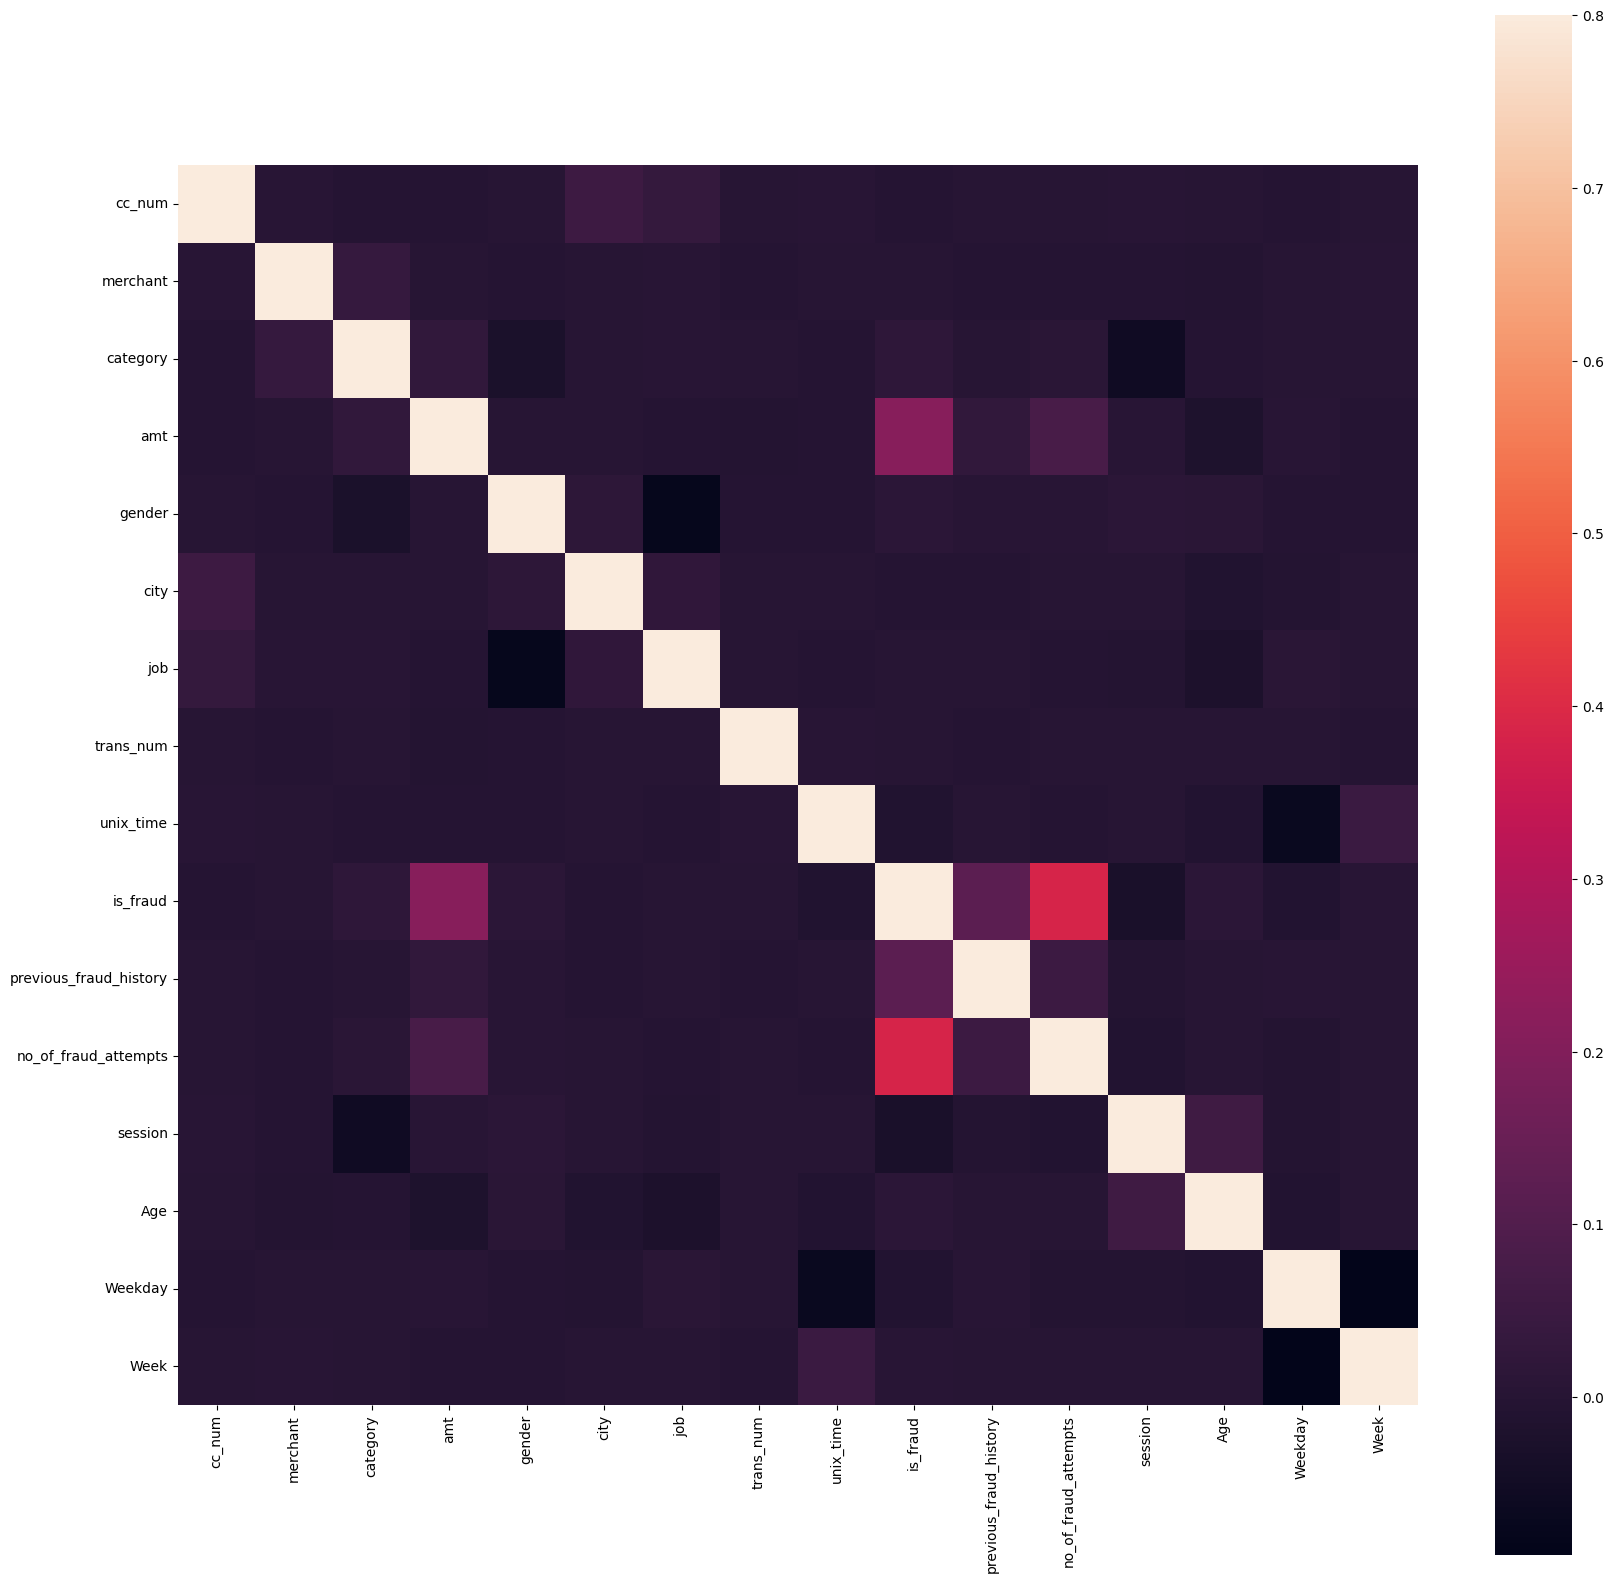

In [24]:
# Correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
corrmat = df.corr()
fig = plt.figure(figsize = (20, 20))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [29]:
# Define features (X) and target (y)
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

In [30]:
# Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [31]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [32]:
# Model building
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
}

In [33]:
# Train models and evaluate
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"Model: {name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"ROC AUC Score: {roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])}")
    print("")

Model: Logistic Regression
Confusion Matrix:
[[29841     3]
 [   85    71]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29844
           1       0.96      0.46      0.62       156

    accuracy                           1.00     30000
   macro avg       0.98      0.73      0.81     30000
weighted avg       1.00      1.00      1.00     30000

ROC AUC Score: 0.9638625124149853

Model: Support Vector Machine
Confusion Matrix:
[[29835     9]
 [   55   101]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29844
           1       0.92      0.65      0.76       156

    accuracy                           1.00     30000
   macro avg       0.96      0.82      0.88     30000
weighted avg       1.00      1.00      1.00     30000

ROC AUC Score: 0.9193107578210112

Model: Decision Tree
Confusion Matrix:
[[29809    35]
 [   27   129]]
Class